# Educación e inclusión en la industria de la tecnología en países hispanos

Ideas:
- Resumir el tema y lo que se hizo
- Poner gráficas con el código oculto
- Colocar pruebas de hipótesis con el código oculto
- Dejar texto explicando lo extraído de las gráficas
- Escribir accionables

Nota para leer este reporte: está pensado para solo ver datos, resultados y conclusiones (como si lo estuviera leyendo un stakeholder). El código detrás está oculto porque ya se realizó en los notebooks anteriores y no es relevante para el propósto de este.


### Temática

El foco de la investigación respecto a la educación será entre la **educación tradicional** (escuelas, universidades, etc.) vs. la **educación NO tradicional** (autodidacta, online, etc.) y su impacto en el empleo y salario.

También se abordará el punto de vista de la **inclusión**.

Esta investigación está centrada en los **países hispanos y Brasil**.

#### 📊 Data: [encuesta 2021 de Stack Ovelfow](https://insights.stackoverflow.com/survey)

### Objetivos

- Comparar la educación tradicional vs. no tradicional y su impacto en la industria tech.
- Descubrir si la industria tech es inclusiva o no.

### Resumen del reporte

### Grupo estudiado

~6300 encuestados de países hispanos y Brasil, de todas las edades.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import os
from scipy import stats
from hypothesize.utilities import trim_mean
from hypothesize.compare_groups_with_single_factor import pb2gen

# read the data
path = os.path.join(os.getcwd(), os.pardir, 'data', 'processed')
df = pd.read_csv(os.path.join(path, 'survey.csv'))

# set styles
sns.set_theme()
pio.templates.default = 'ggplot2'

# function fro plotting
def barploth_normalized(data, title='Title', figsize=(9, 5), padding=-30, label=True):

    if data.shape[0] < 30:
        df_plot = data
    else:
        df_plot = data.value_counts(normalize=True)

    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=round(df_plot*100, 1), y=df_plot.index)
    if label:
        ax.bar_label(ax.containers[0], padding=padding, size=11)
    plt.title(title, size=15)
    plt.xlabel('Porcentaje (%)', size=13)
    plt.margins(0.02)
    plt.show()

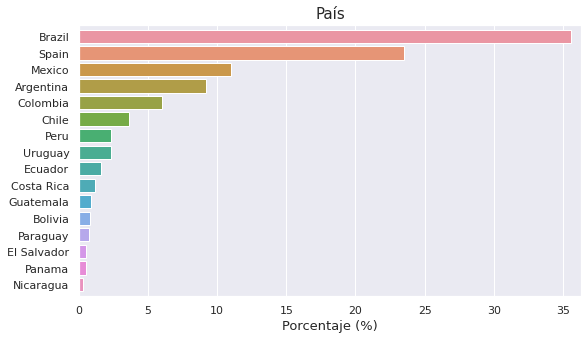

In [ ]:
barploth_normalized(data=df.Country, title='País', label=False)

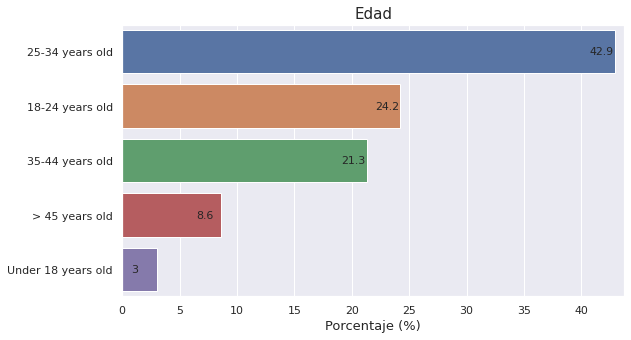

In [ ]:
barploth_normalized(df.Age, title='Edad', padding=-25)

### Educación

De este grupo, el `68,2%` tienen título universitario y un `31,8%` no lo tienen. Este es el porcentaje de cada tipo de título registrado:

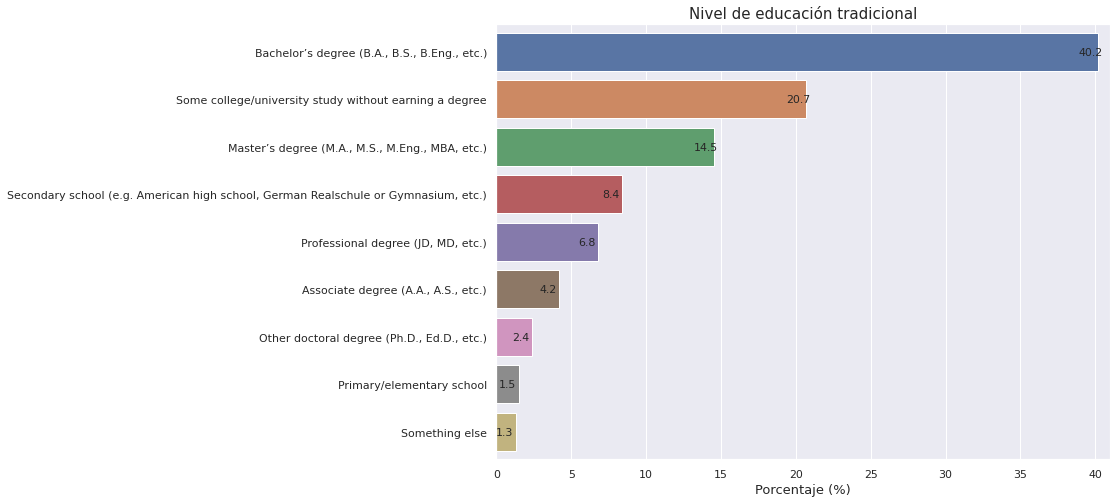

In [ ]:
barploth_normalized(df.EdLevel, title='Nivel de educación tradicional', padding=-20, figsize=(11,8))

Sin importar la edad o el tener título o no, la mayoría aprendió a programar de manera no tradicional (online, autodidacta, etc.), seguido por una combinación de tradicional y no tradicional y por último lo menos común es que se aprenda únicamente de forma tradicional (escuela).

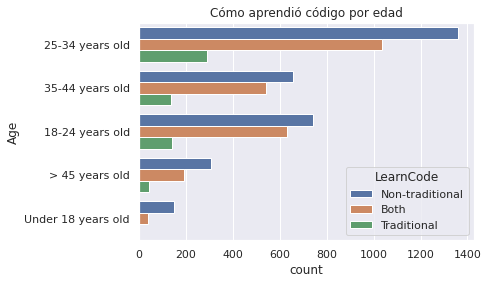

In [ ]:
sns.countplot(y=df.Age, hue=df.LearnCode, hue_order=['Non-traditional', 'Both', 'Traditional'])
plt.title('Cómo aprendió código por edad')
plt.show()

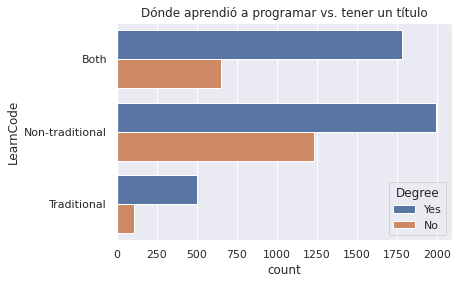

In [ ]:
sns.countplot(y=df.LearnCode, hue=df.Degree)
plt.title('Dónde aprendió a programar vs. tener un título')
plt.show()

### Empleo

La mayoría de los encuestados actualmente tienen trabajo, para el resto del análisis nos centraremos en este grupo ya que se tiene el registro de sus ganancias anuales.

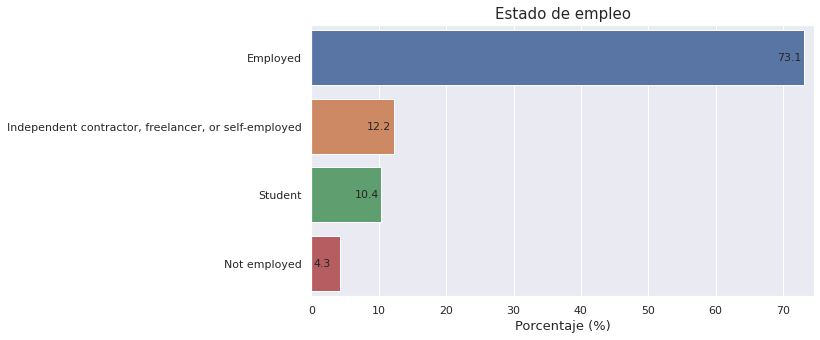

In [ ]:
barploth_normalized(df.Employment, title='Estado de empleo', padding=-27)

De estas personas con y sin empleo, ¿el tener un título universitario influyó en tener empleo?

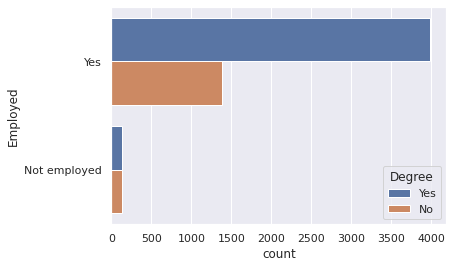

Power_divergenceResult(statistic=array([1.34328358e-01, 1.26539732e+03]), pvalue=array([7.13985796e-001, 3.74065418e-277]))
CON TÍTULO relación empleo/desempleo: 30.450381679389313 empleados por cada 1 desempleado
SIN TÍTULO relación empleo/desempleo: 10.087591240875913 empleados por cada 1 desempleado


In [ ]:
# Reducir variables a tiene o no empleo
df_employment = pd.DataFrame(df[['Degree', 'Age']])
df_employment['Employed'] = df.Employment.where(df.Employment.isin(['Not employed', 'Student']), 'Yes')
df_employment.drop(df_employment.Employed[df_employment.Employed == 'Student'].index, inplace=True)

# Plot
sns.countplot(hue=df_employment.Degree, y=df_employment.Employed)
plt.show()

# Chisquare test
x = df_employment.groupby(['Degree', 'Employed'])['Degree'].count().values.reshape(2,2)
print(stats.chisquare(x))

# Rates
d = df_employment.groupby(['Degree', 'Employed'])['Degree'].count()
print(f'CON TÍTULO relación empleo/desempleo: {d[3]/d[2]} empleados por cada 1 desempleado')
print(f'SIN TÍTULO relación empleo/desempleo: {d[1]/d[0]} empleados por cada 1 desempleado')

Podemos inferir que sí influye tener título universitario para conseguir empleo.

Si analizamos las ganancias anuales por el nivel de educación, se obtiene estos rangos:

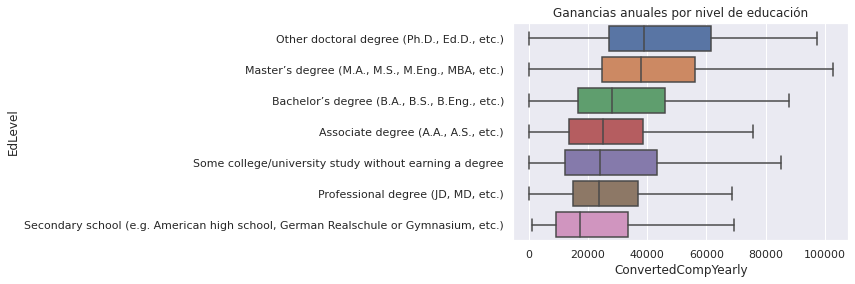

In [ ]:
# New DataFrame
edu = pd.DataFrame(df[['EdLevel', 'ConvertedCompYearly']])
edu.drop(edu.EdLevel[edu.EdLevel.isin(['Primary/elementary school', 'Something else'])].index, inplace=True)

# List to order data
median_salary = edu.groupby('EdLevel')[['ConvertedCompYearly']].agg(np.median) \
.sort_values(by='ConvertedCompYearly', ascending=False)

# Plot
sns.boxplot(y=edu.EdLevel, 
            x=edu.ConvertedCompYearly, 
            order=list(median_salary.index), 
            showfliers=False)
plt.title('Ganancias anuales por nivel de educación')
plt.show()

A simple vista parece que tener mejores salarios está ligado a tener un mayor título universitario. Así que surge la pregunta:

¿El tener título hace que una persona tenga mayores ganancias anualmente respecto a si no lo tiene?

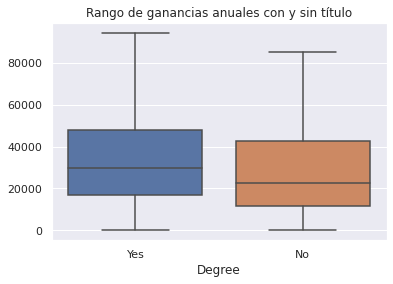

p-value = 0.0
Confidence interval = [4440.423470586778, 7816.220790866813]


In [ ]:
# Plot
sns.boxplot(x=df.Degree, y=df.ConvertedCompYearly, showfliers=False)
plt.title('Rango de ganancias anuales con y sin título')
plt.ylabel(None)
plt.show()

# Diferencia entre las ganancias anuales
s_has_degree = df.ConvertedCompYearly[(df.Degree == 'Yes') & (df.ConvertedCompYearly.notnull())]
s_not_degree = df.ConvertedCompYearly[(df.Degree == 'No') & (df.ConvertedCompYearly.notnull())]

# Hypothesis test
test = pb2gen(s_has_degree, s_not_degree, trim_mean, .2)
print(f'p-value = {test["p_value"]}')
print(f'Confidence interval = {test["ci"]}')

- Hay significancia estadística para inferir que **si una persona tiene título gana más que si no.**
- Además, gana de 4.4k a 7.8k dólares extra anuales al tener título.

¿Haber aprendido código de forma no tradicional inluye en los ingresos?

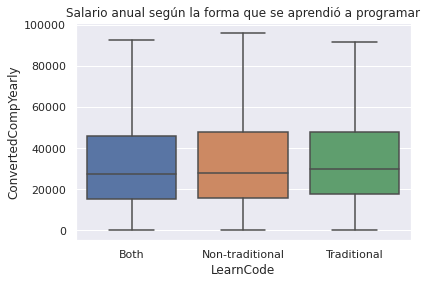

p-value = 0.7504


In [ ]:
# Plot
sns.boxplot(x=df.LearnCode, y=df.ConvertedCompYearly, showfliers=False)
plt.title('Salario anual según la forma que se aprendió a programar')
plt.show()

# Reduzco los datos a: aprendio de forma tradicional o no
df_learn = pd.DataFrame()
df_learn['Salary'] = df.ConvertedCompYearly
df_learn['LearnNoTraditional'] = df.LearnCode.where(df.LearnCode == 'Non-traditional', 'No')
df_learn.LearnNoTraditional.replace('Non-traditional', 'Yes', inplace = True)

# Hypothesis test
not_traditional = df_learn.Salary[df_learn.LearnNoTraditional == 'Yes'].dropna()
traditional = df_learn.Salary[df_learn.LearnNoTraditional == 'No'].dropna()
test = pb2gen(not_traditional, traditional, trim_mean, 0.2, nboot=10000)
print(f'p-value = {test["p_value"]}')

- No hay significancia estadística como para asegurar que hay una diferencia de salarios según el tipo de forma que se aprendió a programar.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09491c61-3767-4289-98fd-88aee19bb45d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>